<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Criptocurrency-Market-Value/blob/main/criptocurrency_Market_values_and_supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip3 install opendatasets --quiet

In [98]:

import opendatasets as od

In [99]:
dataset="https://www.kaggle.com/datasets/thedevastator/cryptocurrency-market-values-and-supply"

In [100]:
data=od.download(dataset)

Skipping, found downloaded files in "./cryptocurrency-market-values-and-supply" (use force=True to force download)


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
raw_df=pd.read_csv("/content/cryptocurrency-market-values-and-supply/top cryto2.csv")

In [103]:
raw_df

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01 September 2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01 September 2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01 September 2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01 September 2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01 September 2022
...,...,...,...,...,...,...,...
595,595,Avalanche,5.089442e+09,17.20,"295,963,244",AVAX,30 September 2022
596,596,Uniswap,4.916393e+09,6.45,"762,209,327",UNI,30 September 2022
597,597,Wrapped Bitcoin,4.756996e+09,19427.69,"244,856",WBTC,30 September 2022
598,598,UNUS SED LEO,3.996808e+09,4.19,"953,954,130",LEO,30 September 2022


Analysing the data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


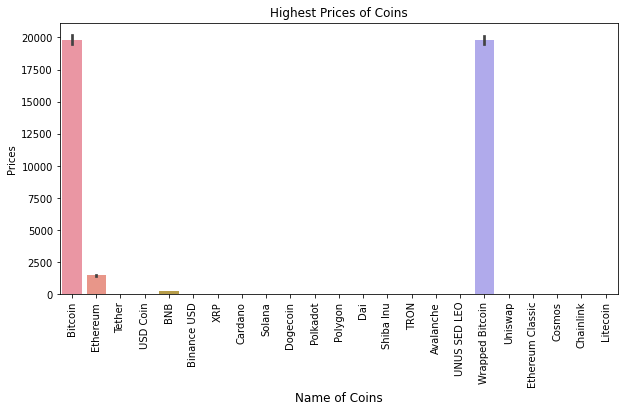

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(raw_df['Name'], raw_df['price'].values)
plt.title('Highest Prices of Coins')
plt.ylabel('Prices')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


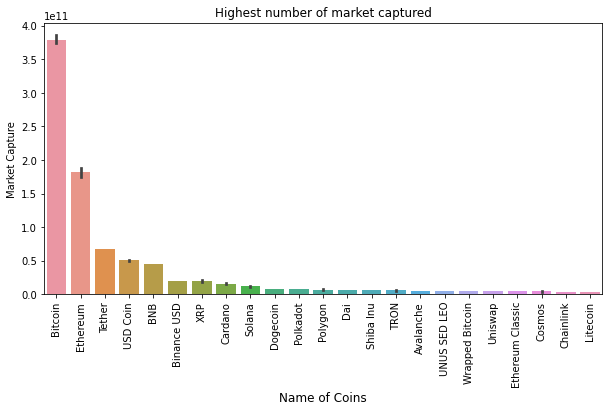

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(raw_df['Name'], raw_df['Market_cap'].values)
plt.title('Highest number of market captured')
plt.ylabel('Market Capture')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Preprocessing the data

In [106]:
raw_df['Date']=pd.to_datetime(raw_df['Date'])
raw_df['Date'] = raw_df['Date'].dt.strftime('%d/%m/%Y')


In [107]:
raw_df["Day"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.day
raw_df["Month"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.month
raw_df["Year"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.year

In [108]:
raw_df.head()

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date,Day,Month,Year
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01/09/2022,1,9,2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01/09/2022,1,9,2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01/09/2022,1,9,2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01/09/2022,1,9,2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01/09/2022,1,9,2022


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


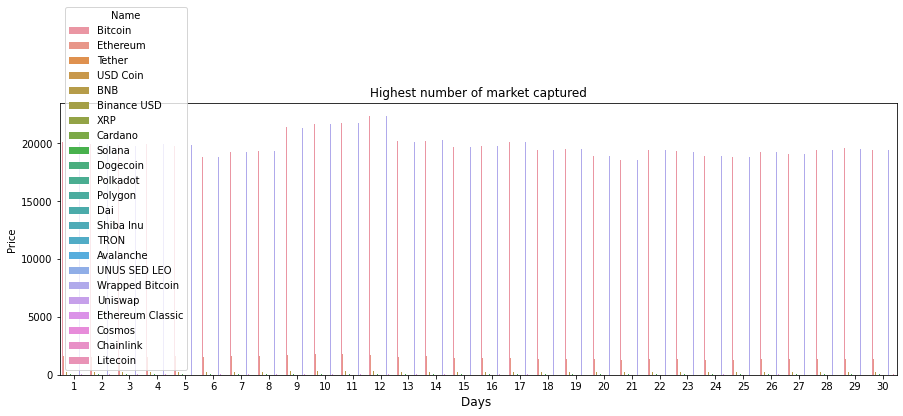

In [109]:
plt.figure(figsize=(15,5))
sns.barplot(raw_df['Day'],raw_df['price'],hue=raw_df['Name'])
plt.title('Highest number of market captured')
plt.ylabel('Price')
plt.xlabel('Days ', fontsize=12)
plt.show()

In [110]:
format_number = lambda x: '{:.2f}'.format(float(x))
raw_df['Market_cap']=raw_df['Market_cap'].apply(format_number)

In [111]:
raw_df['circulating_supply'] = raw_df['circulating_supply'].str.replace(',', '')

In [112]:
raw_df=raw_df.drop(['Unnamed: 0','symbol','Date','Month','Year'],axis=1)

In [113]:

raw_df.head()

,Name,Market_cap,price,circulating_supply,Day
0,Bitcoin,385208305831.57,20127.14,19138750,1
1,Ethereum,193834454491.69,1586.18,122202301,1
2,Tether,67551112128.60,1.00,67550404113,1
3,USD Coin,52026303625.37,1.00,52027528034,1
4,BNB,44919072541.51,278.42,161337261,1
